In [1]:
import numpy as np
import pickle as pkl
from importlib import reload
import matplotlib.pyplot as plt
import nmtf.utils; reload(nmtf.utils)
import nmtf.nmtf
from os import listdir
from nmtf.read import get_adjacency
from os.path import isfile, join
from collections import Counter

In [2]:
path = "/home/vero/Dropbox (DIBRIS)/project_UCL/results/networks1000/cross_val_results"
files = [join(path, f) for f in listdir(path)
             if isfile(join(path, f))]

/home/vero/Dropbox (DIBRIS)/project_UCL/results/networks1000/cross_val_results/Stage3Networkscross_val_results.pkl
[0.19065806697859716, 0.5414097488160963, 0.2677933175645341, 0.30573108763845847, 0.26797331703006105, 0.2459356612557327, 0.19442962682676962, 0.2398835907963028, 0.19334316499022017, 0.1899174414452055]
6
/home/vero/Dropbox (DIBRIS)/project_UCL/results/networks1000/cross_val_results/LuminalANetworkscross_val_results.pkl
[0.14905947171398806, 0.44532198365910675, 0.41799469871111083, 0.3406394263599811, 0.3001230770425878, 0.2723691142428668, 0.23954805990291583, 0.24456328595449697, 0.1907631077154601, 0.1709818741606519]
6
/home/vero/Dropbox (DIBRIS)/project_UCL/results/networks1000/cross_val_results/Stage1Networkscross_val_results.pkl
[0.4383461407414831, 0.3997394552974166, 0.42098197784242425, 0.2432295096072522, 0.2508150384979897, 0.29795277596537945, 0.253517195053595, 0.24357031916160682, 0.19757183090136654, 0.18597057441995407]
10
/home/vero/Dropbox (DIBRIS)/p

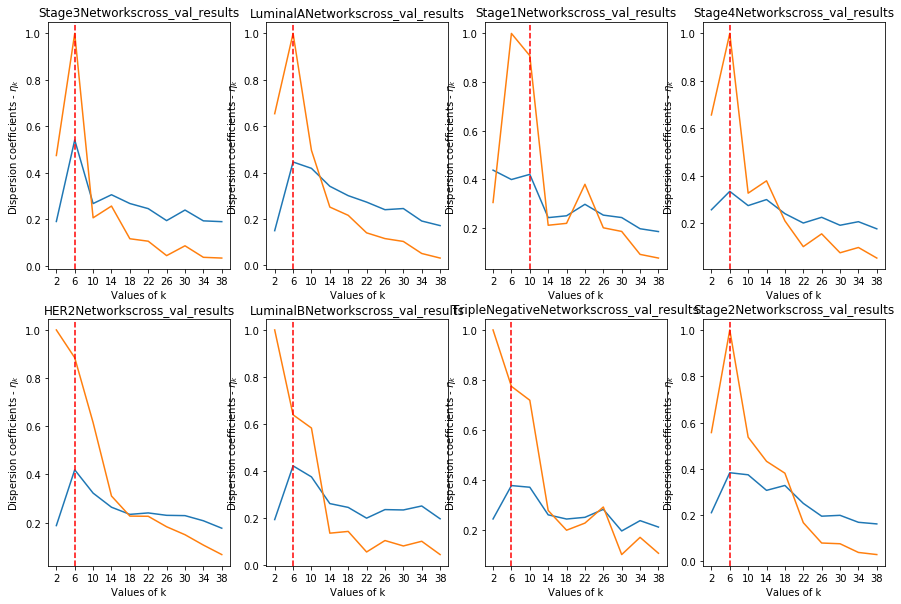

In [5]:
fig, axs = plt.subplots(2,4, figsize=(15,10))
for i,filename in enumerate(files):
    print(filename)
    with open(filename, 'rb') as f:
        u = pkl._Unpickler(f)
        u.encoding = 'latin1'
        p = u.load()
        ks = np.sort(list(p.cv_results_.keys()))
        eta = []
        v =[]
        for k in ks:
            eta.append(p.cv_results_[k][4])
            v.append(p.cv_results_[k][5])
        print(eta)
        best_k = ks[np.argmax(eta)] if i!=2 else 10
        
        print(best_k)
        axs[i//4,i%4].plot(ks, eta, label=r'$\eta$')
        axs[i//4,i%4].plot(ks, v/np.max(v), label=r'$\nu$')
        axs[i//4,i%4].axvline(best_k, c='r', linestyle='--')
        axs[i//4,i%4].set_xlabel("Values of k")
        axs[i//4,i%4].set_ylabel(r'Dispersion coefficients - $\eta_k$')
        title = str(str(filename).split('/')[-1]).split('.')[-2]
        axs[i//4,i%4].set_xticks(ks)
        axs[i//4,i%4].set_title(title)
plt.savefig("/home/vero/Dropbox (DIBRIS)/project_UCL/results/networks1000/cross_val_results/cross_validation_res.pdf", dpi=200, 
  transparent=True, bbox_inches='tight')
plt.show()

In [199]:
# ks = np.sort(list(p.cv_results_.keys()))
# eta = []
# vs = []
# coeff = []
# histrograms = dict.fromkeys(ks)

# for k in ks:
#     print(k)
#     histograms_clusters = []
#     for est in p.cv_results_[k][0]:
#         histograms_clusters.append(Counter(get_clusters(est.G_)))
#     histrograms[k] = histograms_clusters
#     eta.append(p.cv_results_[k][2])
#     vs.append(p.cv_results_[k][3])
#     coeff.append(dispersion_coefficient_Kim(p.cv_results_[k][1]))

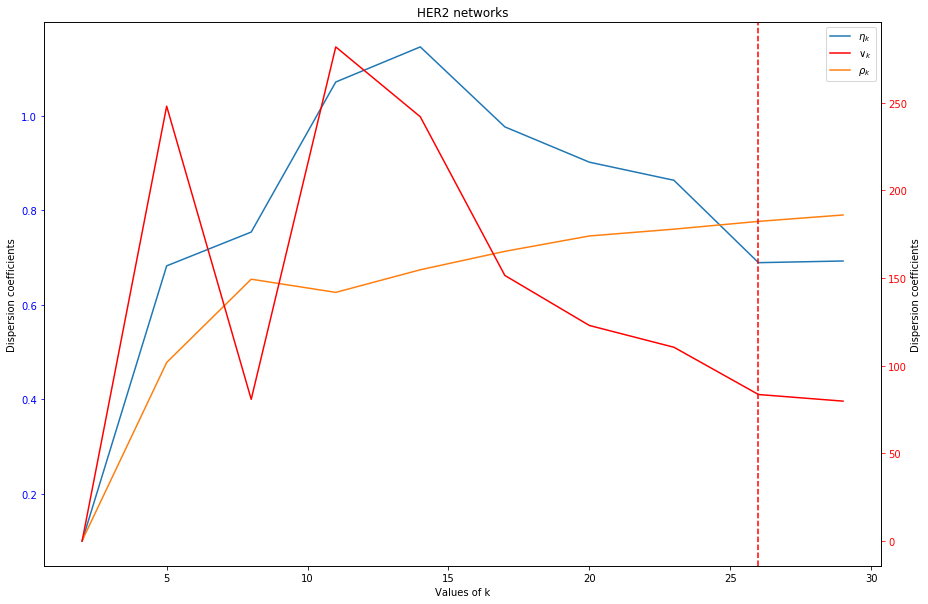

In [197]:
logs = np.log(list(ks))
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
lns1 = ax1.plot(ks, eta, label=r'$\eta_k$')
lns2 = ax2.plot(ks, vs, label=r'$\vee_k$', color='r')
lns3 = ax1.plot(ks, coeff, label=r'$\rho_k$')
plt.axvline(26, c='r', linestyle='--')
#plt.xticks(ks, list(ks))
ax1.set_xlabel("Values of k")
ax1.set_ylabel('Dispersion coefficients')
ax1.tick_params('y', colors='b')
ax2.tick_params('y', colors='r')
plt.ylabel("Dispersion coefficients")
plt.title("HER2 networks")
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.savefig("/Users/veronica/Dropbox (DIBRIS)/project_UCL/cross_validation/HER2_networks.png", dpi=200, 
          transparent=True, bbox_inches='tight')
plt.show()

In [ ]:

# fig, ax1 = plt.subplots(figsize=(15,10))
# ax1.plot(ks, eta, label=r'$\eta_k$', color='b')
# ax1.plot(ks, vs, label=r'$\vee_k$')
# #plt.plot(ks, coeff, label=r'$\rho_k$')
# ax2 = ax1.twinx()
# ax2.plot(ks, coeff_mio, label='MIO', color='r')
# plt.axvline(23, c='r', linestyle='--')
# ax1.axhline(1)
# #plt.xticks(ks, list(ks))
# ax1.set_ylim(0,1.2)
# ax1.set_xlabel("Values of k")
# ax1.set_ylabel('Dispersion coefficients - TRUE', color='b')
# ax1.tick_params('y', colors='b')
# ax2.set_ylabel('Dispersion coefficient - MINE', color='r')
# ax2.tick_params('y', colors='r')
# #plt.ylabel("Dispersion coefficients")
# #plt.title("Triple Negative networks")
# #plt.legend()
# #plt.savefig("/Users/veronica/Dropbox (DIBRIS)/project_UCL/cross_validation/TripleNegative_new_networks.png", dpi=200, 
#  #          transparent=True, bbox_inches='tight')
# fig.tight_layout()
# plt.show()

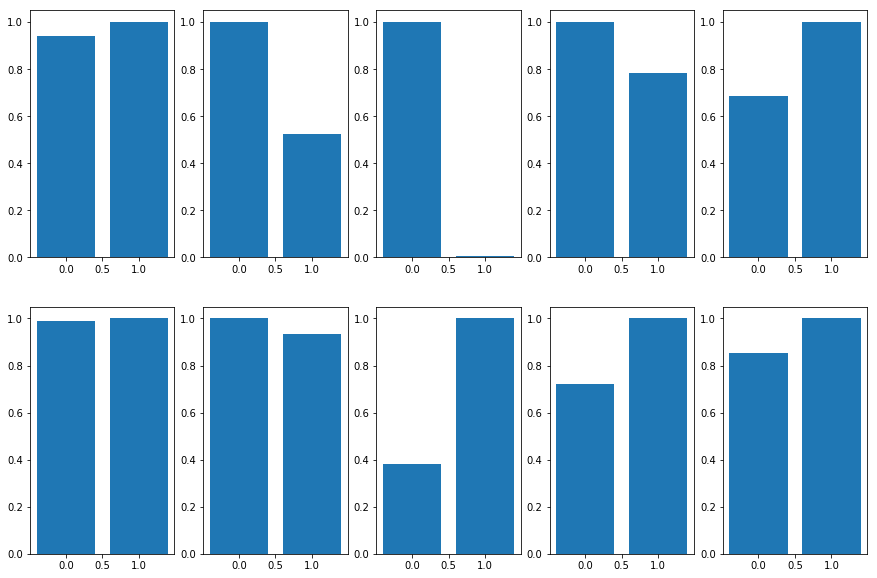

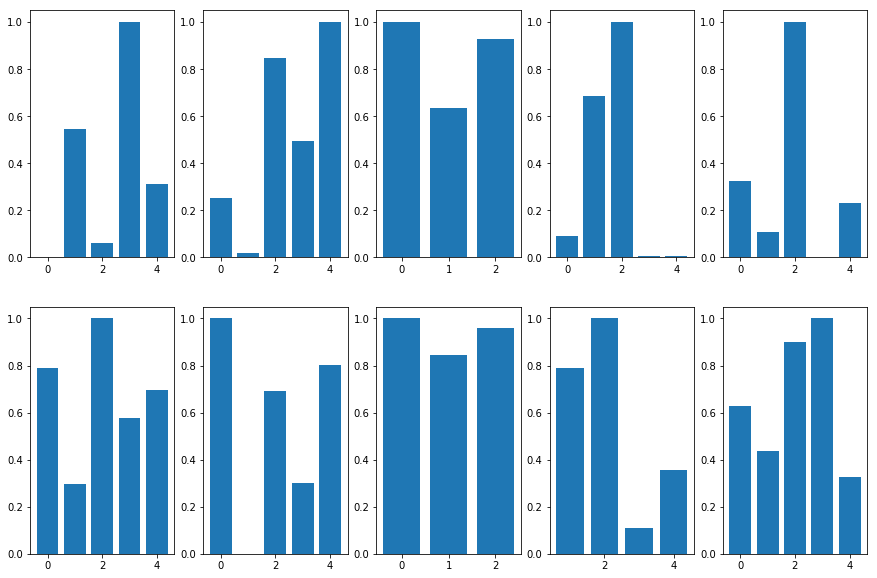

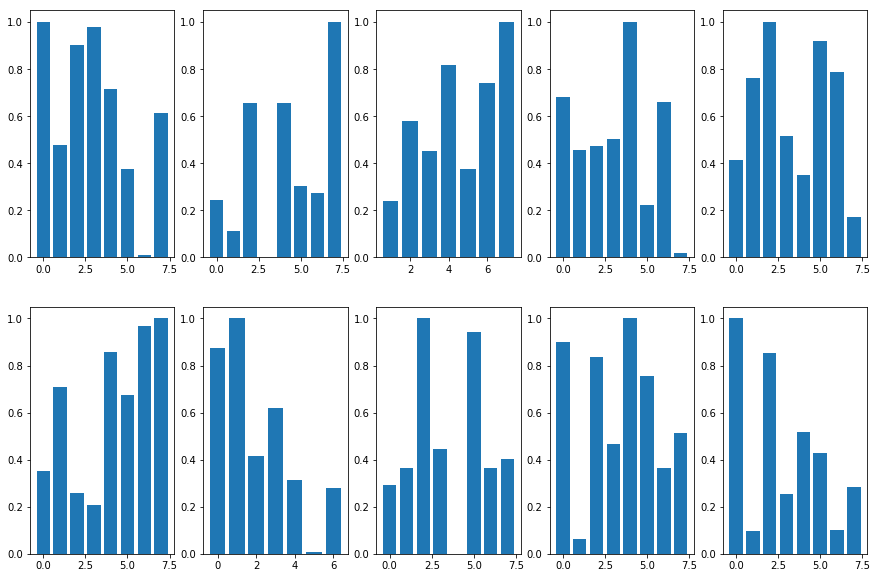

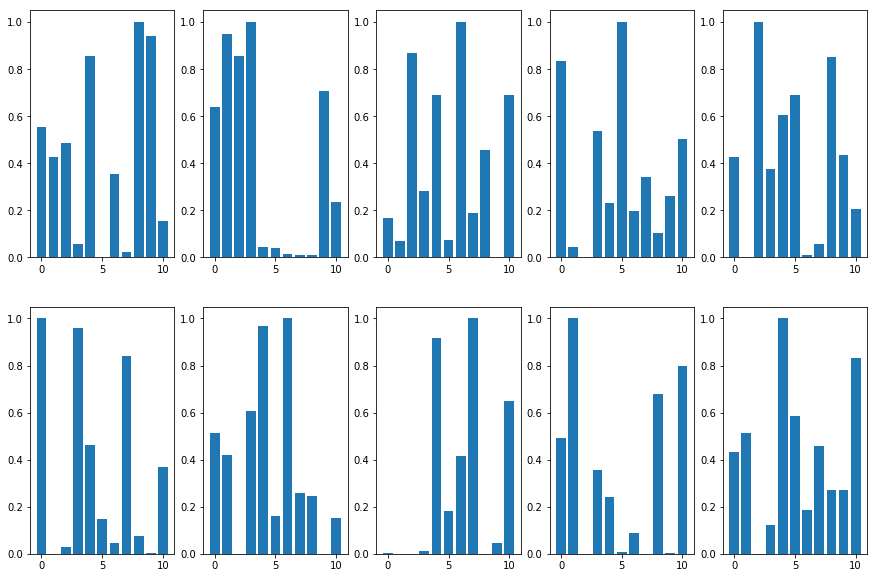

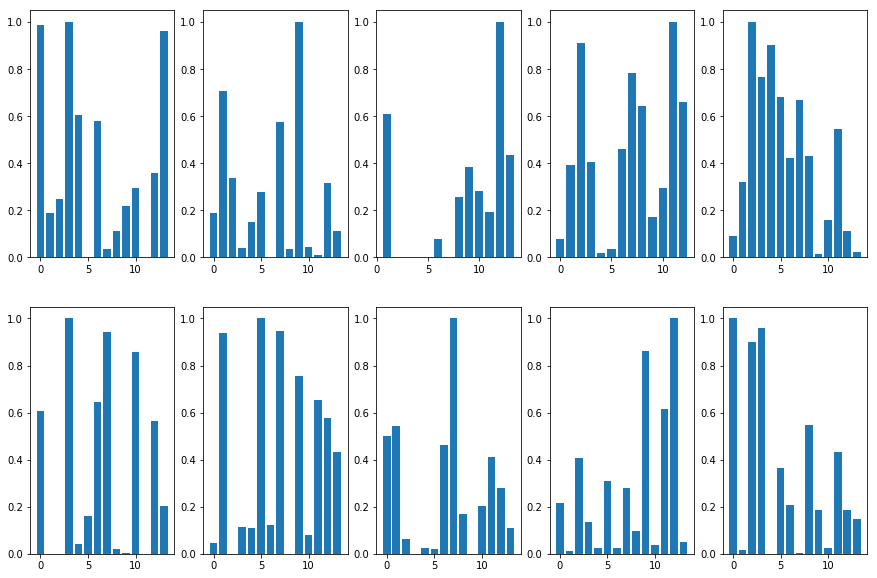

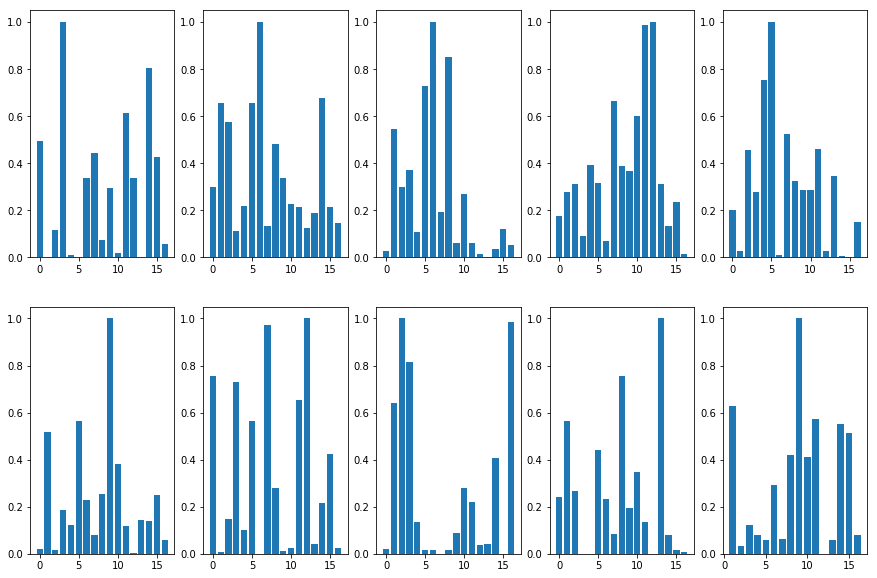

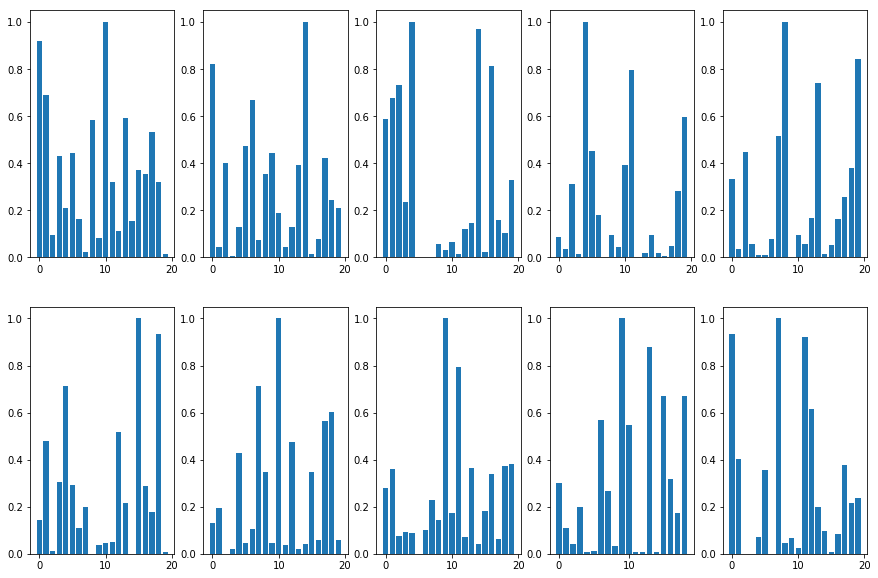

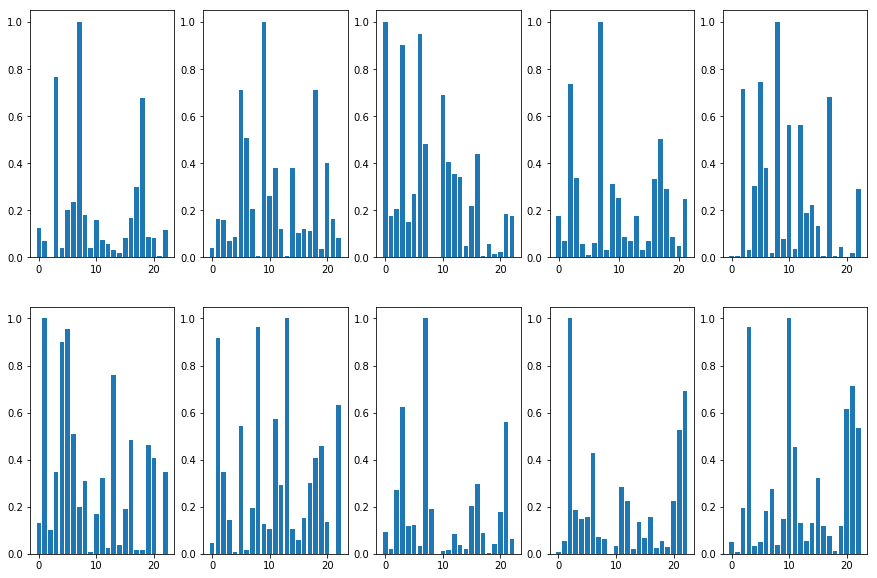

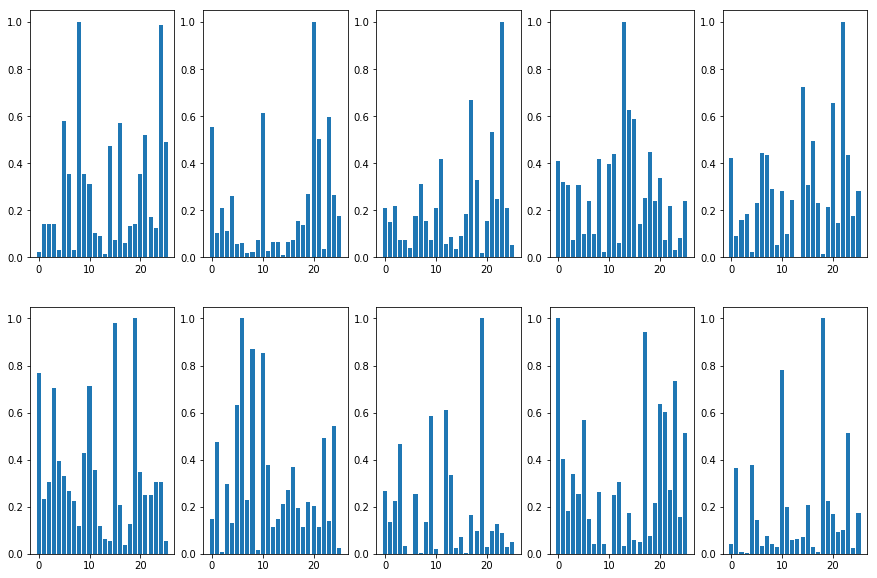

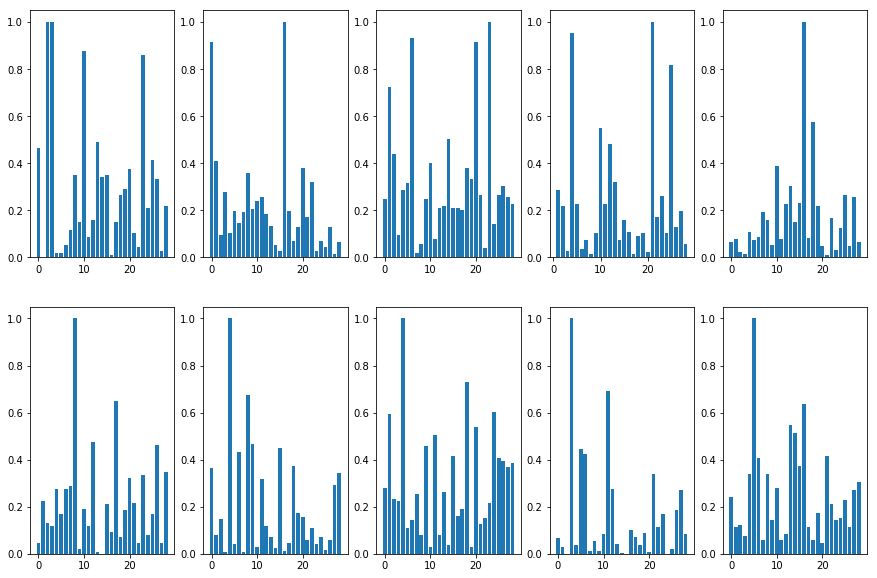

In [163]:
for k in ks:
    f, axs = plt.subplots(2,5,figsize=(15,10))
    j = 0
    for i, hist in enumerate(histrograms[k]):
        axs[i%2, j].bar(hist.keys(), list(hist.values())/np.max(list(hist.values())))
        j+=1
        if j == 5:
            j = 0
    plt.show()